In [11]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [3]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [4]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [5]:
%%time
# training
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=3000
)
train_data_features = count_vectorizer.fit_transform(train_data.text)

CPU times: user 17min 24s, sys: 1.87 s, total: 17min 26s
Wall time: 17min 26s


In [6]:
%%time

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train_data.stars)

CPU times: user 5min 24s, sys: 444 ms, total: 5min 25s
Wall time: 5min 25s


In [7]:
count_vectorizer.get_feature_names()[1100:1110]

['foot',
 'football',
 'forced',
 'forever',
 'forget',
 'forgot',
 'forgotten',
 'fork',
 'form',
 'forth']

In [15]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy                     %s' % accuracy_score(target, predictions))
    print('explained_variance_score     %s' % explained_variance_score(target, predictions) )
    print('mean_absolute_error          %s' % mean_absolute_error(target, predictions) )
    print('mean_squared_error           %s' % mean_squared_error(target, predictions) )
    print('mean_squared_log_error       %s' % mean_squared_log_error(target, predictions) )
    print('r2_score                     %s ' % r2_score(target, predictions) )
    print()
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

In [9]:
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

In [10]:
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(data.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')

accuracy                     0.6483265864644506
explained_variance_score     0.5895470422298754
mean_absolute_error          0.4849573331812912
mean_squared_error           0.879525628599122
mean_squared_log_error       0.0589014484878698
r2_score                     0.5683013820928986 

confusion matrix
 [[11699   734   346   381  1238]
 [ 2979  1819  1638  1091  1095]
 [  994   875  3699  4250  2522]
 [  374   183  1282 10280 12544]
 [  370    61   244  3807 40729]]
(row=expected, col=predicted)
CPU times: user 2min 7s, sys: 376 ms, total: 2min 8s
Wall time: 2min 8s


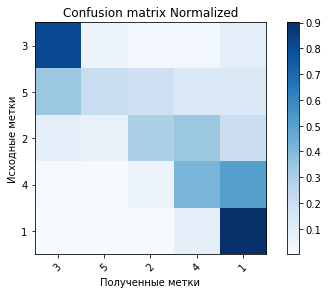

In [16]:
%%time
predict(count_vectorizer, logreg, test_data)